<a href="https://colab.research.google.com/github/victorradael/data_science/blob/main/python_to_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O conjunto de dados utilizado fornece avaliações de pacientes sobre medicamentos
específicos, juntamente com condições relacionadas e uma classificação de 0 a 10 estrelas para
indicar a satisfação geral do paciente. Os dados foram obtidos rastreando sites de revisão
farmacêutica online. a intenção era estudar a análise de sentimento da experiência com o
medicamento em múltiplas facetas, ou seja, sentimentos aprendidos sobre aspectos específicos,
como eficácia e efeitos colaterais, a transferibilidade de modelos entre domínios, ou seja, condições,
e a possibilidade de transferência de modelos entre diferentes fontes de dados.


A base de dados utilizada foi retirada do repositório da UCI Machine Learning Repository[1]
do Conjunto de Dados Drug Review Dataset[2] (Drugs.com)[3]. Os dados foram divididos em um
trem (75%), uma partição de teste (25%) e armazenados em dois arquivos .tsv (valores separados
por tabulação), respectivamente. As colunas foram separadas em Nome do medicamento
(categórico): nome do medicamento, condição (categórica): nome da condição, revisão (texto):
revisão do paciente, classificação (numérica): classificação do paciente de 0 a10 estrelas, data
(data): data da entrada da revisão, conta útil (numérica): número de usuários que acharam a
avaliação útil

O objetivo da análise é poder levantar a eficácia dos medicamentos dentro de cada grupo de
condição além de relacionar o aumento ou diminuição do consumo de determinado tipo de
medicamento no decorrer do tempo.

## 📚 Importando as bibliotecas

In [264]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


## 🌀 Carregando o dataset 

In [265]:
dataset = pd.read_csv('drugsComTrain_raw.tsv', sep='\t', header=0)

### ⚓ Descrevendo o dataset:
1. drugName (categorical): Nome da Droga
2. condition (categorical): Nome da Condição ou Doença
3. review (text): Avaliação do Usuário
4. rating (numerical): Nota do Usuário
5. date (date): Data da Avaliação
6. usefulCount (numerical): Número de pessoas que acharam essa avaliação útil  

## 🐾 Mostrando os cinco primeiro elementos do dataset 

#### 📑 Organizando o dataset:

In [266]:
del dataset['review']
del dataset['Unnamed: 0']

In [267]:
dataset_train.head().T

,0,1,2,3,4
drugName,Valsartan,Guanfacine,Lybrel,Ortho Evra,Buprenorphine / naloxone
condition,Left Ventricular Dysfunction,ADHD,Birth Control,Birth Control,Opiate Dependence
rating,9,8,5,8,9
date,"May 20, 2012","April 27, 2010","December 14, 2009","November 3, 2015","November 27, 2016"
usefulCount,27,192,17,10,37


## ✈ Organizando os Dados

#### 📑 Definindo as condições mais comuns:

In [268]:
dataset[u'condition'].value_counts() 

Birth Control                                  28788
Depression                                      9069
Pain                                            6145
Anxiety                                         5904
Acne                                            5588
                                               ...  
Parkinsonian Trem                                  1
Bartonellosis                                      1
acial Lipoatrophy                                  1
Amyotrophic Lateral Sclerosis                      1
92</span> users found this comment helpful.        1
Name: condition, Length: 884, dtype: int64

In [269]:
df_filtered =dataset[dataset['condition'].isin(['Birth Control', 'Depression', 'Pain', 'Anxiety' ])]
df_filtered[u'condition'].value_counts() 

Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Name: condition, dtype: int64

#### 📑 Separando o dataset em condições:

In [270]:
df_birthcontrol = df_filtered[df_filtered['condition']=='Birth Control']
df_depression = df_filtered[df_filtered['condition']=='Depression']
df_pain = df_filtered[df_filtered['condition']=='Pain']
df_anxiety = df_filtered[df_filtered['condition']=='Anxiety']

# 🏎 Analisando as condições mais populares:

## ⚕ Analisando a eficiência dos medicamentos para Controle de Natalidade:

In [271]:
efficient_birth_control = df_birthcontrol[df_birthcontrol['rating'].isin([10.0, 9.0 ])]

##### 📑 Definindo os medicamentos mais eficientes:

In [272]:
efficient_birth_control['drugName'].value_counts()

Etonogestrel                          1044
Levonorgestrel                        1000
Ethinyl estradiol / norethindrone      732
Nexplanon                              647
Ethinyl estradiol / levonorgestrel     519
                                      ... 
Provera                                  1
Nikki                                    1
Mircette                                 1
Tri-Linyah                               1
Junel Fe 24                              1
Name: drugName, Length: 143, dtype: int64

In [273]:
efficient_birth_control = efficient_birth_control[efficient_birth_control['drugName'].isin(['Etonogestrel', 'Levonorgestrel', 'Ethinyl estradiol / norethindrone', 'Nexplanon' ])]
efficient_birth_control['drugName'].value_counts()

Etonogestrel                         1044
Levonorgestrel                       1000
Ethinyl estradiol / norethindrone     732
Nexplanon                             647
Name: drugName, dtype: int64

In [274]:
efficient_birth_control.groupby('rating')[u'drugName'].value_counts()

rating  drugName                         
9.0     Levonorgestrel                       416
        Etonogestrel                         403
        Ethinyl estradiol / norethindrone    328
        Nexplanon                            253
10.0    Etonogestrel                         641
        Levonorgestrel                       584
        Ethinyl estradiol / norethindrone    404
        Nexplanon                            394
Name: drugName, dtype: int64

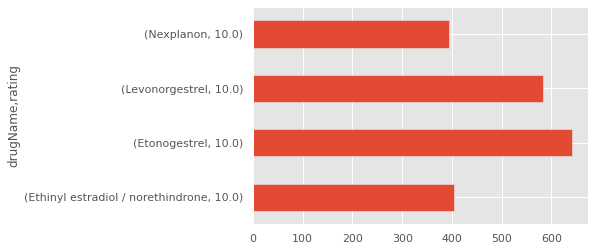

In [277]:
df2 = efficient_birth_control[efficient_birth_control['rating']==10.0]
df2.groupby(u'drugName')['rating'].value_counts().plot.barh()

## ⚕ Analisando a eficiência dos medicamentos para Depressão:

In [278]:
efficient_depression = df_depression[df_depression['rating'].isin([10.0, 9.0 ])]

##### 📑 Definindo os medicamentos mais eficientes:

In [279]:
efficient_depression['drugName'].value_counts()

Bupropion         271
Sertraline        216
Desvenlafaxine    198
Pristiq           196
Escitalopram      195
                 ... 
Xanax XR            1
Maprotiline         1
Aplenzin            1
Atomoxetine         1
Paliperidone        1
Name: drugName, Length: 100, dtype: int64

In [280]:
efficient_depression = efficient_depression[efficient_depression['drugName'].isin(['Bupropion', 'Sertraline', 'Desvenlafaxine', 'Pristiq' ])]
efficient_depression['drugName'].value_counts()

Bupropion         271
Sertraline        216
Desvenlafaxine    198
Pristiq           196
Name: drugName, dtype: int64

In [281]:
efficient_depression.groupby('rating')[u'drugName'].value_counts()

rating  drugName      
9.0     Bupropion         113
        Sertraline         90
        Pristiq            85
        Desvenlafaxine     83
10.0    Bupropion         158
        Sertraline        126
        Desvenlafaxine    115
        Pristiq           111
Name: drugName, dtype: int64

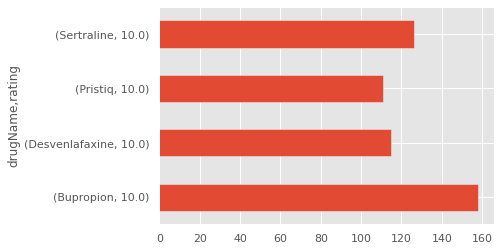

In [282]:
df2 = efficient_depression[efficient_depression['rating']==10.0]
df2.groupby(u'drugName')['rating'].value_counts().plot.barh()

## ⚕ Analisando a eficiência dos medicamentos para Dor:

In [290]:
efficient_pain = df_pain[df_pain['rating'].isin([10.0, 9.0 ])]

##### 📑 Definindo os medicamentos mais eficientes:

In [291]:
efficient_pain['drugName'].value_counts()

Oxycodone                      215
Acetaminophen / hydrocodone    186
Acetaminophen / oxycodone      174
Tramadol                       134
Diclofenac                     126
                              ... 
Doans Pills Extra Strength       1
Oxyfast                          1
Midol PM                         1
Lorcet                           1
Menthol                          1
Name: drugName, Length: 173, dtype: int64

In [292]:
efficient_pain = efficient_pain[efficient_pain['drugName'].isin(['Oxycodone', 'Acetaminophen / hydrocodone', 'Acetaminophen / oxycodone', 'Tramadol' ])]
efficient_pain['drugName'].value_counts()

Oxycodone                      215
Acetaminophen / hydrocodone    186
Acetaminophen / oxycodone      174
Tramadol                       134
Name: drugName, dtype: int64

In [293]:
efficient_pain.groupby('rating')[u'drugName'].value_counts()

rating  drugName                   
9.0     Oxycodone                       83
        Acetaminophen / hydrocodone     80
        Acetaminophen / oxycodone       67
        Tramadol                        63
10.0    Oxycodone                      132
        Acetaminophen / oxycodone      107
        Acetaminophen / hydrocodone    106
        Tramadol                        71
Name: drugName, dtype: int64

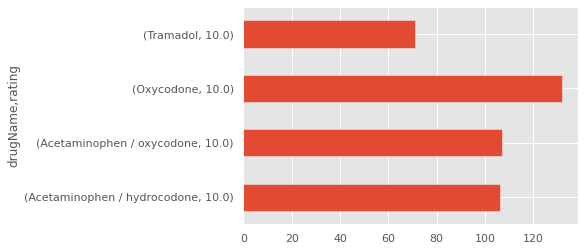

In [294]:
df2 = efficient_pain[efficient_pain['rating']==10.0]
df2.groupby(u'drugName')['rating'].value_counts().plot.barh()

## ⚕ Analisando a eficiência dos medicamentos para Ansiedade:

In [295]:
efficient_anxiety = df_anxiety[df_anxiety['rating'].isin([10.0, 9.0 ])]

##### 📑 Definindo os medicamentos mais eficientes:

In [296]:
efficient_anxiety['drugName'].value_counts()

Alprazolam      333
Escitalopram    296
Clonazepam      285
Lexapro         227
Xanax           211
               ... 
Stelazine         1
Miltown           1
Nefazodone        1
Compazine         1
Tranxene SD       1
Name: drugName, Length: 73, dtype: int64

In [297]:
efficient_anxiety = efficient_anxiety[efficient_anxiety['drugName'].isin(['Alprazolam', 'Escitalopram', 'Clonazepam', 'Lexapro' ])]
efficient_anxiety['drugName'].value_counts()

Alprazolam      333
Escitalopram    296
Clonazepam      285
Lexapro         227
Name: drugName, dtype: int64

In [298]:
efficient_anxiety.groupby('rating')[u'drugName'].value_counts()

rating  drugName    
9.0     Escitalopram    116
        Lexapro          91
        Clonazepam       86
        Alprazolam       72
10.0    Alprazolam      261
        Clonazepam      199
        Escitalopram    180
        Lexapro         136
Name: drugName, dtype: int64

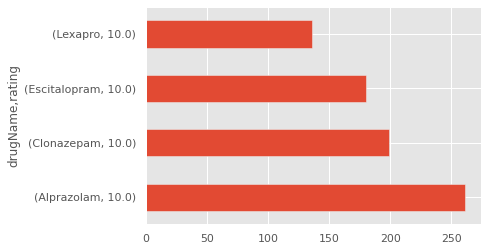

In [299]:
df2 = efficient_anxiety[efficient_anxiety['rating']==10.0]
df2.groupby(u'drugName')['rating'].value_counts().plot.barh()

# 📅 Analisando o consumo de medicamentos no decorrer do tempo:

In [345]:
df = dataset['date'].value_counts().reset_index()
df['index'] = df['index'].astype('datetime64')
df['date'] = df['date'].astype('int')

#crio uma coluna year
df['year'] = df['index'].map(lambda x: x.year )

#junto pelo year igual somando a date
df = df.groupby(['year']).sum().reset_index()
df

,year,date
0,2008,5137
1,2009,11636
2,2010,8413
3,2011,11682
4,2012,10007
5,2013,12278
6,2014,12051
7,2015,27164
8,2016,34842
9,2017,28087


<BarContainer object of 10 artists>

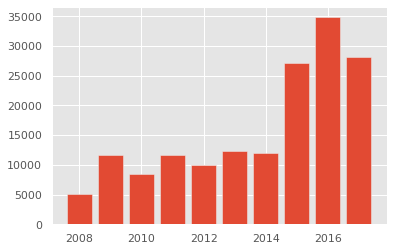

In [346]:
plt.bar(df['year'], df['date'])
